In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__, keras.__version__, sep='\n')

2.6.0
2.6.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
y_train_full.shape

(60000,)

In [7]:
y_test.dtype

dtype('uint8')

In [8]:
# dividing by 255.0 to get pixel intensity vals bw 0 and 1

X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [10]:
class_names[y_train[1]]

'T-shirt/top'

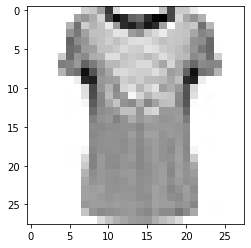

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1], cmap='binary')

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # flat input layer of size 28x28
# Alt: models.add(keras.layers.InputLayer(input_shape=[28,28]))

model.add(keras.layers.Dense(300, activation='relu')) # hidden layer 1 with relu activation fn and 300 neurons
# keras maintains its own weight matrix and also a vector of bias terms (one per neuron)
model.add(keras.layers.Dense(100, activation='relu'))
# activations can also be specified as: keras.activations.relu

model.add(keras.layers.Dense(10, activation='softmax')) # output layer with softmax activation as all classes are exclusive

In [26]:
# instead of above cell, we couldve done the below too
model1 = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[28,28]),
    keras.layers.Dense(300, activation=keras.activations.relu),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### params explaination
First hidden layer:<br>
(28 x 28 x 300)+300 bias terms = 235500 params<br>
<br>
Second Hidden Layer:<br>
(300 x 100)+100=30100<br>
<br>
Output layer:<br>
(100 x 10)+10 = 1010

In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]

In [16]:
hidden1.name

'dense'

In [17]:
model.get_layer('dense') is hidden1

True

In [19]:
keras.utils.plot_model(model, "fash_mnist.png", show_shapes = True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [22]:
weights, biases = model.layers[1].get_weights()

In [23]:
weights.shape

(784, 300)

In [24]:
biases.shape

(300,)

In [25]:
weights

array([[-0.06798387,  0.05608858, -0.02231784, ...,  0.01955361,
        -0.06674974,  0.07102156],
       [ 0.05870247,  0.03452008, -0.02757192, ..., -0.01847598,
        -0.00074268, -0.03480899],
       [-0.06636503,  0.0508008 ,  0.04920488, ..., -0.04041875,
        -0.00660435, -0.05617137],
       ...,
       [ 0.07347767,  0.00875117, -0.01885757, ...,  0.05394867,
         0.04767516,  0.02296095],
       [ 0.02038369,  0.01268739,  0.07112691, ..., -0.06930275,
         0.03169132, -0.03323339],
       [ 0.00265867,  0.0717513 ,  0.00791587, ...,  0.01693795,
        -0.04524706,  0.06115247]], dtype=float32)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics='accuracy')
# LOSS
# sparse categorical crossentropy cuz the target labels are exclusive probabilities (most will be 0)
# if they were one-hot labels instead (everything 0 except the predicted class), then categorical_crossentropy
# if it were binary classification then binary_crossentropy (+sigmoid fn in op layer)

# OPTIMIZER
# sgd: stochastic gradient descent, meaning we're gonna use backpropagation

# METRICS
# accuracy is fine for classification tasks, we can specify other metrics to evaluate too over here.

In [28]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7189 - accuracy: 0.7711 - val_loss: 0.5037 - val_accuracy: 0.8270
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4873 - accuracy: 0.8307 - val_loss: 0.4529 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4442 - accuracy: 0.8453 - val_loss: 0.4122 - val_accuracy: 0.8604
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4177 - accuracy: 0.8539 - val_loss: 0.4446 - val_accuracy: 0.8418
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3964 - accuracy: 0.8611 - val_loss: 0.3804 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3815 - accuracy: 0.8654 - val_loss: 0.3818 - val_accuracy: 0.8672
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3681 - accuracy: 0.8699 - val_loss: 0.3813 - val_accuracy

In [30]:
history.history

{'loss': [0.7189075946807861,
  0.487314373254776,
  0.444229394197464,
  0.4176928699016571,
  0.39644521474838257,
  0.38153669238090515,
  0.36810287833213806,
  0.3554444909095764,
  0.34586846828460693,
  0.33512449264526367,
  0.32707273960113525,
  0.31850379705429077,
  0.3109956383705139,
  0.3049016296863556,
  0.29740190505981445,
  0.29208335280418396,
  0.284921795129776,
  0.27950334548950195,
  0.2752196788787842,
  0.2684794068336487,
  0.264460027217865,
  0.26027899980545044,
  0.2551870346069336,
  0.25161805748939514,
  0.24600812792778015,
  0.24210798740386963,
  0.23868370056152344,
  0.2352018803358078,
  0.23042835295200348,
  0.22672222554683685],
 'accuracy': [0.7710545659065247,
  0.8307090997695923,
  0.8452908992767334,
  0.8539090752601624,
  0.861054539680481,
  0.8654000163078308,
  0.8698909282684326,
  0.8734727501869202,
  0.8770545721054077,
  0.8811091184616089,
  0.8844727277755737,
  0.8858000040054321,
  0.8876000046730042,
  0.8895999789237976,

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'Epoch')

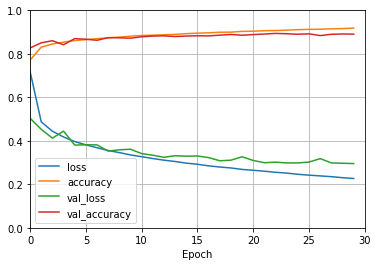

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.xlim(0,30)
plt.ylim(0,1)
plt.grid()
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.xlabel('Epoch')

(0.0, 1.0)

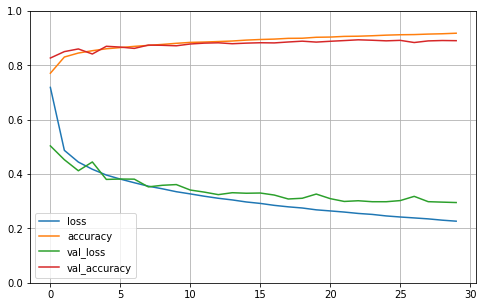

In [42]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)

In [49]:
model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=keras.optimizers.SGD(learning_rate=0.02),
                    metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.2245 - accuracy: 0.9182 - val_loss: 0.3192 - val_accuracy: 0.8874
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2200 - accuracy: 0.9204 - val_loss: 0.2943 - val_accuracy: 0.8952
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2160 - accuracy: 0.9217 - val_loss: 0.2960 - val_accuracy: 0.8944
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2125 - accuracy: 0.9230 - val_loss: 0.2925 - val_accuracy: 0.8950
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2098 - accuracy: 0.9253 - val_loss: 0.2879 - val_accuracy: 0.8974
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2056 - accuracy: 0.9257 - val_loss: 0.3004 - val_accuracy: 0.8898
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2020 - accuracy: 0.9288 - val_loss: 0.2947 - val_accuracy

Text(0.5, 0, 'Epoch')

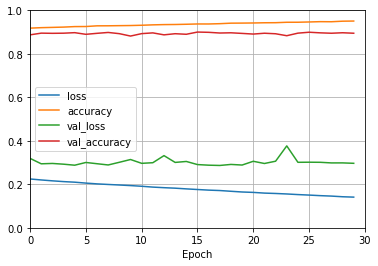

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.xlim(0,30)
plt.ylim(0,1)
plt.grid()
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.xlabel('Epoch')

In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 71.4959 - accuracy: 0.8543


[71.49591827392578, 0.8543000221252441]

In [52]:
X_new = model.predict(X_test[:3])

In [54]:
X_new

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

TypeError: Invalid shape (3, 28, 28) for image data

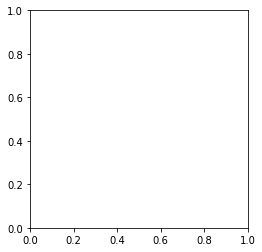

In [57]:
plt.imshow(X_test[:3])